In [306]:
# Import Your code
from byscratch.linear_algebra import Vector, Matrix
from byscratch.linear_algebra import make_matrix
from byscratch.linear_algebra import sum_of_squares
from byscratch.linear_algebra import dot
from byscratch.linear_algebra import subtract
from byscratch.linear_algebra import magnitude
from byscratch.linear_algebra import scalar_multiply
from byscratch.linear_algebra import vector_mean
from byscratch.linear_algebra import distance
from byscratch.linear_algebra import add

from byscratch.statistics import correlation
from byscratch.statistics import standard_deviation
from byscratch.statistics import median
from byscratch.statistics import mean
from byscratch.statistics import de_mean
from byscratch.statistics import standard_deviation



from byscratch.gradient_descent import gradient_step

from byscratch.probability import inverse_normal_cdf

from byscratch.working_with_data import rescale


# python library imports
import random, datetime, re, csv, math, enum
from collections import defaultdict, Counter, OrderedDict
from typing import Tuple, List, NamedTuple, Optional, Callable
from typing import TypeVar, List, Iterator

# external code
from dateutil.parser import parse
import tqdm

# pyplot configs
import seaborn as sns
from matplotlib import pyplot as plt

# font
plt.rcParams.update({'font.size': 8})

# reset the default figsize value
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# 144 is good for a high-resolution display. Try 100 if it's too big
plt.rcParams["figure.dpi"] = (80)

import pandas as pd

df = pd.read_csv('/Users/nickcrites/Desktop/byscratch/Data/bike_sharing_daily.csv')

In [307]:
df.shape

(731, 16)

In [308]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [309]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [310]:
#remove dteday and replace with day
for i,date in enumerate(df['dteday']):
    df['dteday'][i] = i
df


/var/folders/xf/8808rrps3wb3r170fzcq_6t00000gn/T/ipykernel_44267/2028128599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dteday'][i] = i


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [311]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [312]:
from collections import Counter

data_dict = csv.DictReader(open('/Users/nickcrites/Desktop/byscratch/Data/bike_sharing_daily.csv'))


temp = []
atemp = []
hum = []
windspeed = []
casual_1 = []
reg = []
count = []
workingday = []


for row in data_dict:
    tem = float(row["temp"])
    temp.append(tem)

    avgtemp = float(row["atemp"])
    atemp.append(avgtemp)

    humidity = float(row["hum"])
    hum.append(humidity)

    wndspd = float(row["windspeed"])
    windspeed.append(wndspd)

    cas = float(row["casual"])
    casual_1.append(cas)
    
    cnt = float(row['cnt'])
    count.append(cnt)
    
    wd = float(row['workingday'])
    workingday.append(wd)
    
    r = float(row['registered'])
    reg.append(r)


In [313]:
print(f"The mean temperature is {mean(temp)}, median is {median(temp)}")

print(f"The mean humidity is {mean(hum)}, median is {median(hum)}")

print(f"The mean bike riders per day is {mean(count)}, median is {median(count)}")

The mean temperature is 0.49538478850889184, median is 0.498333
The mean humidity is 0.6278940629274962, median is 0.626667
The mean bike riders per day is 4504.3488372093025, median is 4548.0


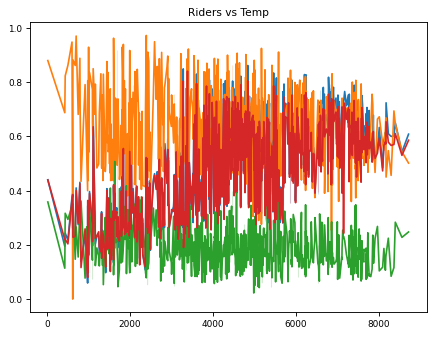

In [314]:
#plot users against weather data
sns.lineplot(
     y=temp,
     x=count)
sns.lineplot(
     y=hum,
     x=count)
sns.lineplot(
     y=windspeed,
     x=count)
sns.lineplot(
     y=atemp,
     x=count)



plt.title("Riders vs Temp")
plt.show()

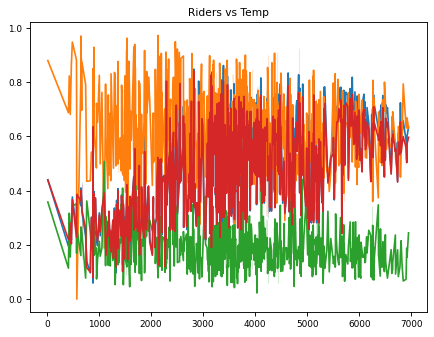

In [315]:
#plot users against weather data
sns.lineplot(
     y=temp,
     x=reg)
sns.lineplot(
     y=hum,
     x=reg)
sns.lineplot(
     y=windspeed,
     x=reg)
sns.lineplot(
     y=atemp,
     x=reg)



plt.title("Riders vs Temp")
plt.show()

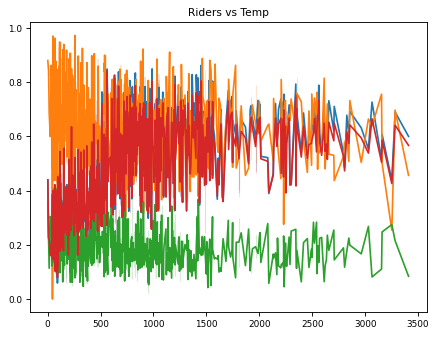

In [318]:
#plot users against weather data
sns.lineplot(
     y=temp,
     x=casual_1)
sns.lineplot(
     y=hum,
     x=casual_1)
sns.lineplot(
     y=windspeed,
     x=casual_1)
sns.lineplot(
     y=atemp,
     x=casual_1)



plt.title("Riders vs Temp")
plt.show()

In [319]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [320]:
df = df.drop(['registered','instant','dteday'],axis = 1)
df = df.drop(['casual'], axis = 1)

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [321]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Get a list of the animal classes to test the predictions (the TARGET)

y=df['cnt'].values
df = df.drop(['cnt'], axis =1)
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train, y_train)

decisionTree.score(X_train,y_train), decisionTree.score(X_test,y_test)


(1.0, 0.7813779944231195)

In [322]:
decisionTree.predict(X_test)

array([7461., 1530., 3577., 6235., 7466., 7347., 1450., 2660., 6969.,
       5728., 2311., 2455., 5020., 5035., 2425., 2417., 2895., 7804.,
       5191., 2947., 7375., 4672., 5847., 1526., 1865., 3873., 2162.,
       6824., 2947., 5633., 3190., 4760., 6772., 8120., 6857., 6392.,
       6855., 4549., 3894.,  431., 3429., 3389., 7261., 4539., 7013.,
       1607., 4326., 4579., 6273., 6392., 4835., 3190., 1317., 4086.,
       3805., 4760., 1996., 4563., 3855., 6591., 6917., 5585., 2162.,
       7765., 6359., 5687., 5713., 4086., 2162., 8227., 5312., 2115.,
       3750., 3267., 4169., 4400., 5035., 4539., 1321., 4086., 2236.,
       2210., 5611., 6392., 3740., 3376., 5010., 3649., 3523., 3392.,
       1543., 7592., 5847., 5062., 2729.,  920., 5046., 2493., 2765.,
       5538., 7605., 3840., 7641., 1472., 1683., 5501., 2660., 3190.,
       6904., 1708., 4086., 7570., 4186., 8009., 5260., 4760., 1446.,
       4270., 5336., 3005., 6857., 2765., 2703., 1562., 4687., 5634.,
       4332., 2429.,

In [323]:
y_test

array([6606, 1550, 3747, 6041, 7538, 7264, 1605, 2209, 7499, 5743, 1796,
       3068, 4891, 5260, 2133, 2471, 2046, 8156, 5362, 2298, 7697, 5463,
       5409, 1872, 1807, 5130, 2121, 7436, 3830, 5557, 2743, 3644, 6196,
       7494, 5918, 3372, 7582, 6053, 2566, 1263, 3944, 3956, 7580, 4906,
       6966,  705, 4458, 5298, 6043, 4996, 3351, 2431, 1011, 4475, 4725,
       4727, 2395, 3351, 4788, 7175, 6153, 7442, 1471, 7865, 6530, 6211,
       7403, 4302, 2077, 7333, 3117, 1635, 3811, 4595, 4363, 2034, 5686,
       4748, 1416, 4401, 2114, 2028, 5668,   22, 3940, 4118, 5423, 1495,
       3620, 3403, 1501, 7040, 5992, 4990, 3095, 2832, 4713, 2368, 3409,
       4991, 7713, 3785, 6664, 2496, 2077, 5267, 1162, 2739, 6861, 1360,
       4602, 7282, 3570, 8167, 6230, 4511, 1461, 3272, 5923, 2177, 6398,
       1817, 3239, 1349, 3867, 5146, 4541, 3368, 2134, 7410, 3331, 3974,
       5495, 5319, 5895, 2227, 4367, 7460, 1977, 4266, 4864, 1913, 2132,
       4258, 2792, 5180, 3958, 4094, 1842, 3614, 42

[Text(159.7600729830995, 213.25846153846155, 'X[7] <= 0.432\nmse = 3701548.014\nsamples = 562\nvalue = 4580.253'),
 Text(68.83524298469388, 204.89538461538461, 'X[1] <= 0.5\nmse = 2325704.008\nsamples = 220\nvalue = 3057.573'),
 Text(43.91260714285715, 196.53230769230768, 'X[0] <= 3.0\nmse = 1141314.121\nsamples = 107\nvalue = 2184.832'),
 Text(24.469438775510206, 188.16923076923078, 'X[2] <= 1.5\nmse = 401176.473\nsamples = 76\nvalue = 1657.974'),
 Text(10.693102040816328, 179.80615384615385, 'X[9] <= 0.634\nmse = 151273.533\nsamples = 26\nvalue = 1198.077'),
 Text(6.627673469387756, 171.44307692307692, 'X[5] <= 0.5\nmse = 108383.356\nsamples = 17\nvalue = 1337.235'),
 Text(3.8262857142857145, 163.07999999999998, 'X[8] <= 0.205\nmse = 18761.102\nsamples = 7\nvalue = 1028.571'),
 Text(2.7330612244897963, 154.71692307692308, 'X[10] <= 0.314\nmse = 4244.24\nsamples = 5\nvalue = 949.6'),
 Text(2.186448979591837, 146.35384615384615, 'X[10] <= 0.257\nmse = 217.25\nsamples = 4\nvalue = 981.5

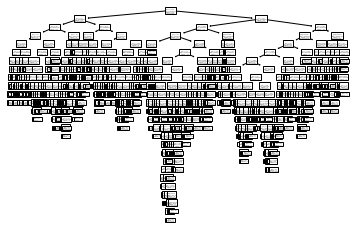

In [324]:
from sklearn import tree

tree.plot_tree(decisionTree)

In [325]:
decisionTree.feature_importances_

array([5.26007287e-02, 2.88819719e-01, 3.63271159e-02, 1.98149887e-04,
       1.65522266e-02, 5.76001054e-03, 1.13513952e-02, 4.22990399e-01,
       6.35503404e-02, 6.78081802e-02, 3.40417348e-02])

In [335]:
decisionTree.score(X_train,y_train), decisionTree.score(X_test,y_test)


(1.0, 0.7813779944231195)

In [334]:
feat_importance= {}
for i, value in enumerate(decisionTree.feature_importances_):
    feat_importance[df.columns[i]] = value
feat_importance

{'season': 0.0526007287107407,
 'yr': 0.2888197189116713,
 'mnth': 0.03632711594058896,
 'holiday': 0.00019814988737917817,
 'weekday': 0.01655222655379984,
 'workingday': 0.005760010539921377,
 'weathersit': 0.011351395173884216,
 'temp': 0.4229903988563525,
 'atemp': 0.06355034039227599,
 'hum': 0.06780818024803162,
 'windspeed': 0.03404173478535429}

In [328]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [329]:
clf.score(X_train,y_train), clf.score(X_test,y_test)

(0.750325446619853, 0.6894226363843974)

In [332]:
clf.feature_importances_

RF_feat_importance= {}
for i, value in enumerate(clf.feature_importances_):
    RF_feat_importance[df.columns[i]] = value
RF_feat_importance

{'season': 0.04046002550010585,
 'yr': 0.3444540552231378,
 'mnth': 0.0,
 'holiday': 0.0,
 'weekday': 0.0,
 'workingday': 0.0,
 'weathersit': 0.0,
 'temp': 0.4518180358659262,
 'atemp': 0.16326788341083012,
 'hum': 0.0,
 'windspeed': 0.0}